In [1]:
from Basefolder import basefolder
import time
import numpy as np
from Finder_1d import Finder_1d
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
import seaborn as sns
from sklearn.cluster import DBSCAN
from Clustering_CAML import Clustering_CAML
import h5py
from DbscanLoop import DbscanLoop
from sklearn.neighbors import NearestNeighbors
import pickle
import pandas as pd

In [15]:
def PlotScatter(labels,filename_add=""):
    
    fig,ax = plt.subplots(1,1,figsize=(6,6)); 
       
    mark = (labels==-1);
    ax.scatter(x=XC[mark,0],y=XC[mark,1],s=.4,c='grey',alpha=0.1);

    mark = (labels>=0);
    sns.scatterplot(x=XC[mark,0],y=XC[mark,1],hue=labels[mark],palette='deep',linewidth=0,
                    s=2,legend=False,ax=ax);
    ax.set_aspect('equal');
    plt.savefig(outputfolder+"results_"+filename_add+".pdf",bbox_inches="tight");

In [3]:
if(True):
    outputfolder = 'temp/';
    filename     = '/Users/andreas/Documents/NoiseRecognizer_WorkingVersion/ProteinData_ttx_1hr_2/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20.hdf5';

    datascale = 158; #=81/512*1000
    #Define window to analyse
    xInt = [22000,27000];#30000
    yInt = [22000,27000];#30000
elif(False):
    outputfolder = '/Users/andreas/Documents/NoiseRecognizer_WorkingVersion/MikeData/';
    filename     = outputfolder +'XC_red.txt'
    datascale    = 1; #=81/512*1000
    #Define window to analyse
    xInt = [0,np.Infinity];
    yInt = [0,np.Infinity];

In [4]:
if(filename[-3:]=="txt"):
    XC = np.loadtxt(filename);
elif(filename[-4:]=="hdf5"):
#filename = '/Users/andreas/Documents/NoiseRecognizer_WorkingVersion/ProteinData_ttx_1hr_2/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20.hdf5';
    f             = h5py.File(filename, 'r')    
    dset          = f['locs'];
    XC            = np.stack((dset["x"],dset["y"])).T    

XC        = np.unique(XC,axis=0);
XC        = datascale*XC;

mark = (XC[:,0]>xInt[0])*(XC[:,0]<xInt[1])*(XC[:,1]>yInt[0])*(XC[:,1]<yInt[1]);
XC   = XC[mark,:];

In [5]:
all_labels    = [];

FD             = Finder_1d(algo="DbscanLoop");
labels  = FD.fit(XC);    

Boundaries for sigma    : 14.07426813740076 , 133.4552450948347
Postprocessing..
Computing similarity scores: 265.56 seconds
Selected threshold , sigma : 3.0 , 43.33918439250144


In [9]:
with open(outputfolder+'temp.pickle','wb') as handle:
    pickle.dump({'FD':FD}, handle,protocol=pickle.HIGHEST_PROTOCOL)   

In [10]:
with open(outputfolder+'temp.pickle', 'rb') as fr:
    FD_load = pickle.load(fr);

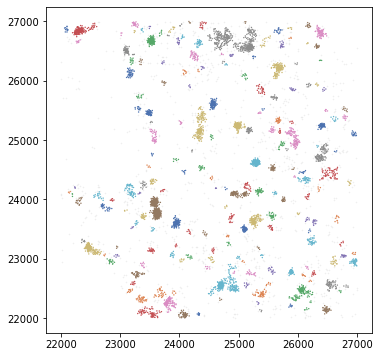

In [11]:
PlotScatter(FD.labels)

In [8]:
FD

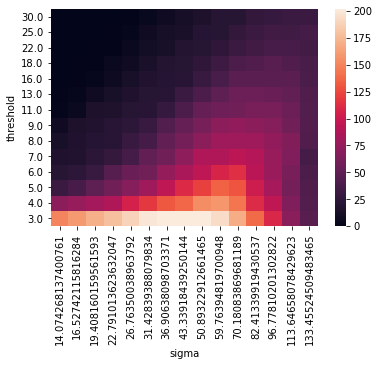

In [12]:
df1 = FD.phasespace[['sigma', 'threshold','no_clusters']]
heatmap1_data = pd.pivot_table(df1, values='no_clusters', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data);
ax.invert_yaxis()

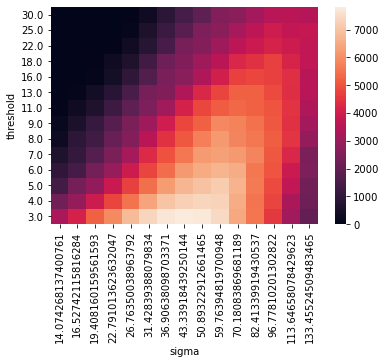

In [13]:
df1 = FD.phasespace[['sigma', 'threshold','similarityScore']]
heatmap1_data = pd.pivot_table(df1, values='similarityScore', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data);
ax.invert_yaxis()

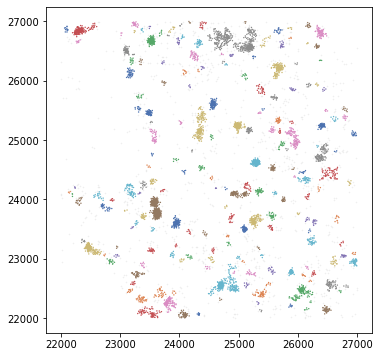

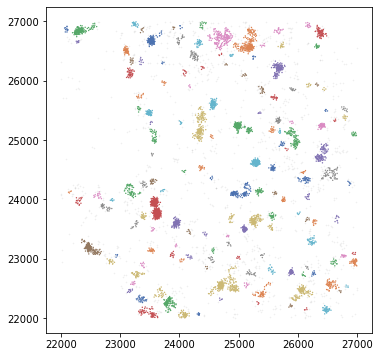

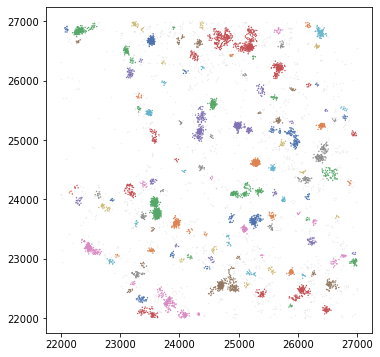

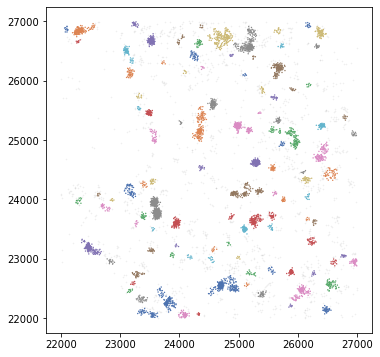

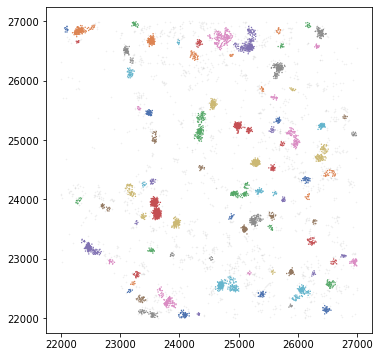

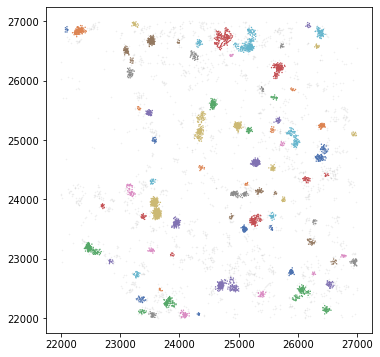

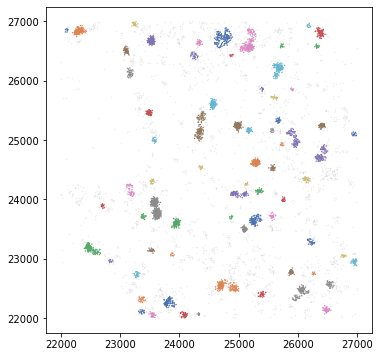

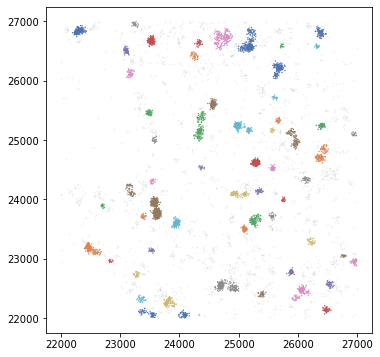

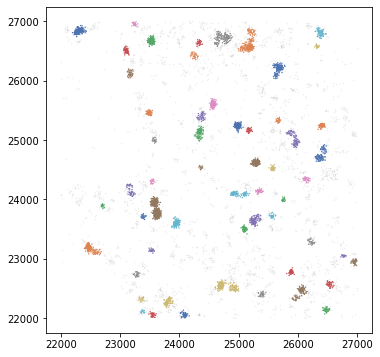

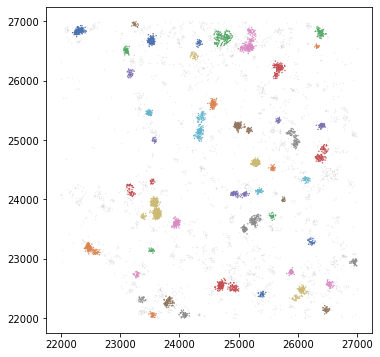

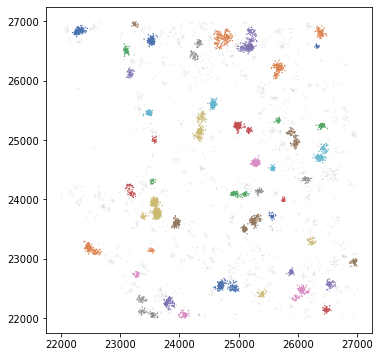

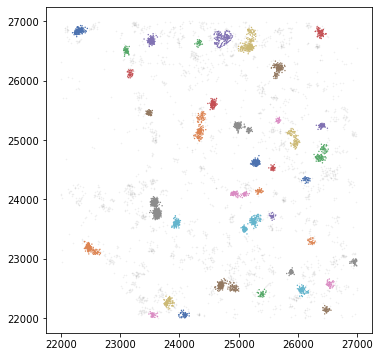

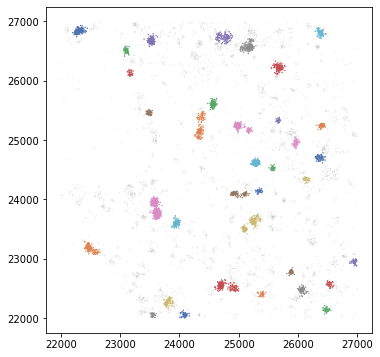

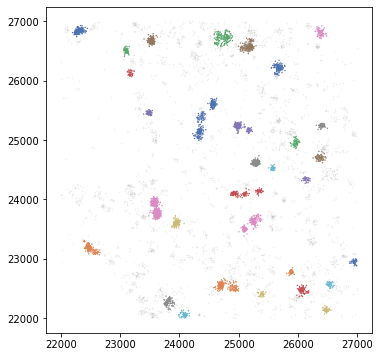

In [19]:
for th in np.unique(FD.phasespace['threshold']):
    mark = (FD.phasespace['threshold'] == th);
    PS_sel = FD.phasespace.loc[mark,:];
    idx_max = PS_sel['similarityScore'].idxmax();
    PlotScatter(PS_sel.loc[idx_max,'labels'],str(th));

In [ ]:
PS_sel.loc[:,'labels']